In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

np.random.seed(42)

In [2]:
df = pd.read_csv('classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [3]:
# Create dataframe with all control records
control_df = df.query('group=="control"')

# Compute completion rate
control_cr = control_df['completed'].mean()

# Display completion rate
control_cr

0.37199519230769229

In [6]:
# Create dataframe with all experiment records
experiment_df  = df.query('group=="experiment"')

# Compute completion rate
experiment_ctr = experiment_df['completed'].mean()


# Display completion rate
experiment_ctr

0.39353348729792148

In [9]:
# Compute observed difference in completion rates
obs_diff = experiment_ctr-control_cr

# Display observed difference in completion rates
obs_diff

0.02153829499022919

In [11]:
# Create sampling distribution for difference in completion rates
# with boostrapping
diffs = []
for _ in range(10000):
    sample = df.sample(df.shape[0], replace=True)
    control_mean = sample.query('group == "control"').completed.mean()
    experiment_mean = sample.query('group == "experiment"').completed.mean()
    diffs.append(experiment_mean - control_mean)


In [12]:
# convert to numpy array
diffs = np.array(diffs)

(array([   10.,    85.,   449.,  1353.,  2457.,  2777.,  1837.,   776.,
          224.,    32.]),
 array([-0.0381512 , -0.02679438, -0.01543755, -0.00408072,  0.0072761 ,
         0.01863293,  0.02998976,  0.04134658,  0.05270341,  0.06406024,
         0.07541706]),
 <a list of 10 Patch objects>)

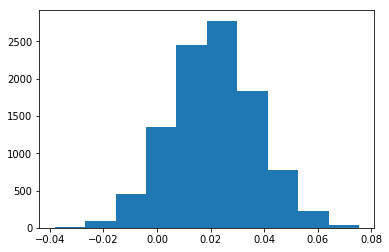

In [13]:
# plot distribution
plt.hist(diffs)

In [14]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0,diffs.std(),diffs.size)

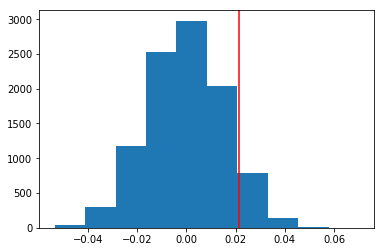

In [15]:
# plot null distribution
plt.hist(null_vals)

# plot line for observed statistic
plt.axvline(obs_diff,color="red")

In [16]:
# compute p value
(null_vals>obs_diff).mean()

0.085199999999999998